In [2]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import expr
from statsrat.expr.predef.pvl_iti import aab_renewal
from extn_rw_models import *
from plotnine import *

In [3]:
model = elem
#model = refined
save_plots = True
print(model.pars)

par_vals = {'elem': [0.2, 5],
            'refined': [0.001, 0.2, 1.5, 5.0]}

            min   max  default
lrate       0.0   1.0      0.2
resp_scale  0.0  10.0      1.0


In [4]:
print('AAB renewal \n')

# It seems that we need to simulate the task with ITIs in order for
# basic RW learning to produce the renewal effect.

trials = aab_renewal.make_trials('experimental')
ds_exp = model.simulate(trials, par_vals[model.name])

trials = aab_renewal.make_trials('control')
ds_ctl = model.simulate(trials, par_vals[model.name])

print(aab_renewal.oats['renewal'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(aab_renewal.oats['renewal'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

AAB renewal 

0.22731847851641207
       schedule     trial_name u_name  mean_resp
0  experimental  cs -> nothing     us   0.779888
0       control  cs -> nothing     us   0.552570


control


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_aab_b_elem.jpeg


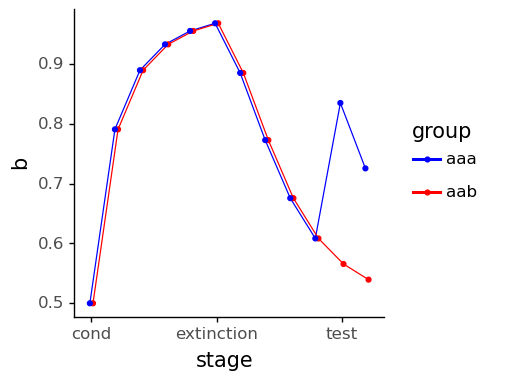

In [5]:
print(ds_ctl.attrs['schedule'])
plot_b = sr.multi_plot([ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'aab', 'experimental': 'aaa'},
                       only_main = True,
                       draw_points = True,
                       dodge_width = 1.5)
plot_b += scale_color_manual(values = {'aab': 'red', 'aaa': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_aab_b_' + model.name + '.jpeg', dpi = 300)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_aab_w_elem.jpeg


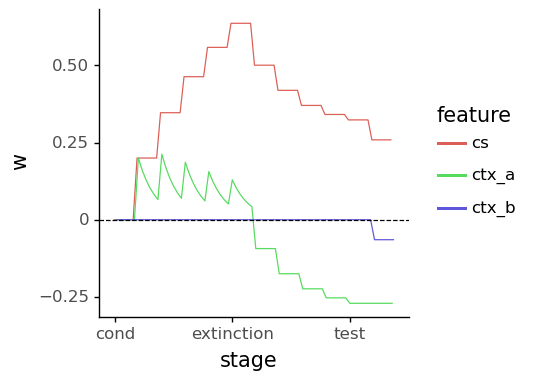

In [7]:
plot_w = sr.learn_plot(ds_exp,
                       var = 'w',
                       rename_coords = {'f_name': 'feature'},
                       sel = {'t': ds_exp['stage_name'].isin(['cond', 'extinction', 'test'])})
plot_w += geom_hline(yintercept = 0, linetype = "dashed")
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_aab_w_' + model.name + '.jpeg', dpi = 300)